In [1]:
from PIL import Image, ImageFont, ImageDraw
import requests
from io import BytesIO
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
from skimage import data
from skimage.exposure import histogram

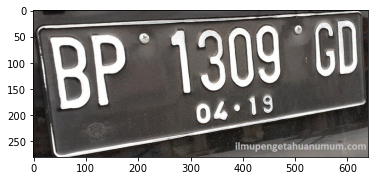

In [3]:
#Url to image
url = "https://i2.wp.com/ilmupengetahuanumum.com/wp-content/uploads/2014/10/plat-mobil.jpg?resize=640%2C280&ssl=1"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

#Save image
img.save("tugas.jpg", "JPEG")
plt.imshow(img)
img.show()

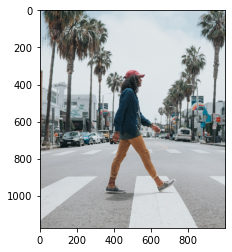

In [4]:
#Url to image
url = "https://images.unsplash.com/photo-1519255122284-c3acd66be602?ixid=MXwxMjA3fDB8MHxzZWFyY2h8Mnx8d2Fsa2luZ3xlbnwwfHwwfA%3D%3D&ixlib=rb-1.2.1&w=1000&q=80"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

#Save image
img.save("tugas2.jpg", "JPEG")
plt.imshow(img)
img.show()

(-0.5, 639.5, 279.5, -0.5)

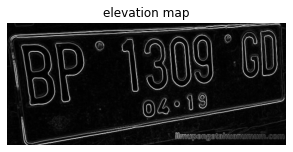

In [5]:
from skimage.filters import sobel

plat = cv2.imread("tugas.jpg",cv2.IMREAD_GRAYSCALE)
elevation_map = sobel(plat)

fig, ax = plt.subplots(figsize=(5,3))
ax.imshow(elevation_map,cmap=plt.cm.gray)
ax.set_title('elevation map')
ax.axis('off')

In [6]:
from skimage import morphology, filters
from skimage import data
import matplotlib.image as mpimg

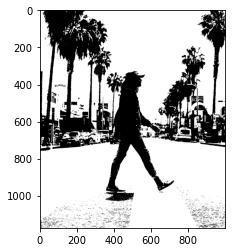

In [7]:
import cv2

img = cv2.imread('tugas2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

plt.imshow(thresh, cmap=plt.cm.gray)

In [8]:
#noise removal
kernel = np.ones((2,1), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 5)

#sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)

#finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.05*dist_transform.max(), 212,0)

#finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

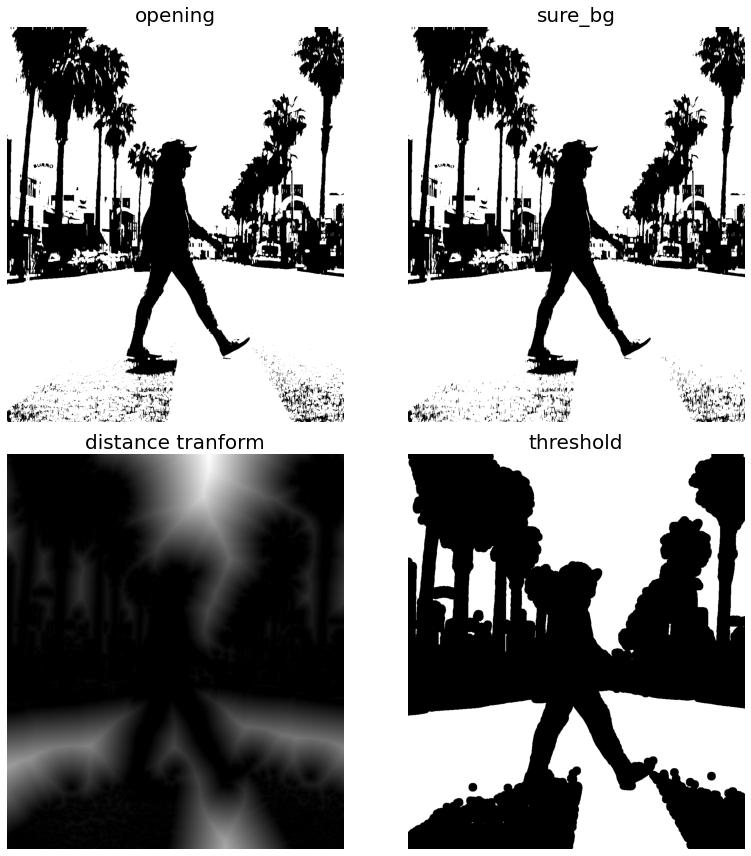

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12), sharex=True,sharey=True)

ax = axes.ravel()

ax[0].imshow(opening, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('opening', fontsize=20)

ax[1].imshow(sure_bg, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('sure_bg', fontsize=20)

ax[2].imshow(dist_transform, cmap=plt.cm.gray)
ax[2].axis('off')
ax[2].set_title('distance tranform', fontsize=20)

ax[3].imshow(sure_fg, cmap=plt.cm.gray)
ax[3].axis('off')
ax[3].set_title('threshold', fontsize=20)

plt.tight_layout()
plt.show()

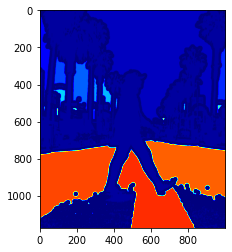

In [16]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers,cmap=plt.cm.jet)


Text(0.5, 1.0, 'markers')

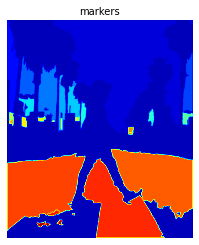

In [18]:
markers = cv2.watershed(img,markers)
img[markers == + 1] = [255,0,0]
plt.imshow(markers, cmap=plt.cm.jet)
plt.axis('off')
plt.title('markers', fontsize=10)